# 主成分分析


In [1]:
# 模擬データ作成
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [2]:
np.random.seed(0)

In [3]:
# 2次元の正規分布で模擬データ300人分を作成
mean = [165,60]
cov = [[15,20],[20,10]] # 分散共分散行列
X = np.random.multivariate_normal(mean,cov,300) # 2次元データ作成

C:\Users\jin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.


In [5]:
X[:10]

array([[158.17546095,  52.49853337],
       [164.9104108 ,  51.65030942],
       [155.2097746 ,  54.96426289],
       [160.6526239 ,  56.72083707],
       [166.19405366,  59.53866811],
       [167.04587562,  56.43868563],
       [161.96248319,  56.86946068],
       [163.70947133,  57.6292318 ],
       [158.22362684,  54.77512853],
       [162.09484312,  60.58764302]])

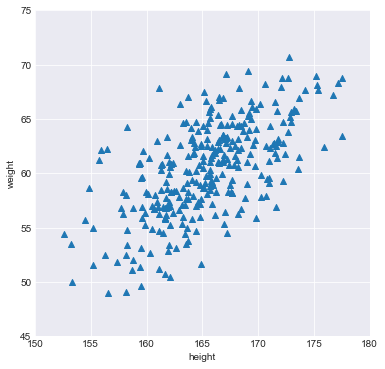

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(X.T[0],X.T[1],marker='^')
plt.xlim(150,180)
plt.ylim(45,75)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

# 主成分分析の実装

In [8]:
from sklearn import  preprocessing,decomposition

In [9]:
# データの正規化
sc = preprocessing.StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [10]:
X_std[:10]

array([[-1.52274199, -1.81021216],
       [-0.08757593, -2.00518269],
       [-2.15470697, -1.24344603],
       [-0.9948776 , -0.83968449],
       [ 0.1859585 , -0.19198524],
       [ 0.36747521, -0.90453908],
       [-0.71575665, -0.80552226],
       [-0.34348691, -0.63088326],
       [-1.51247821, -1.28691996],
       [-0.68755177,  0.04912939]])

In [11]:
# 主成分分析の実施
pca = decomposition.PCA(random_state=0)
pca.fit(X_std) # PCAの計算
X_pca = pca.transform(X_std) # PCAをX_stdに実施

In [12]:
# 主成分分析の結果
print('主成分の分散説明率')
print(pca.explained_variance_ratio_)

print('固有ベクトル')
print(pca.components_)

主成分の分散説明率
[0.81346872 0.18653128]
固有ベクトル
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


# 第一主成分の固有ベクトルの軸をプロットする

In [13]:
# 第一主成分の軸を描画するために軸上の2点がほしい
# 平均値に，正規化操作分を戻した固有ベクトルを足す
pca_point1 = sc.mean_ - sc.inverse_transform(pca.components_)[0]
pca_point2 = sc.mean_ + sc.inverse_transform(pca.components_)[0]
pca_point = np.c_[pca_point1,pca_point2] # 点を列方向に足す

In [14]:
pca_point1

array([3.31831196, 3.07628489])

In [17]:
sc.mean_

array([165.32138729,  60.37390445])

In [18]:
pca.components_

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [19]:
sc.inverse_transform(pca.components_)

array([[162.00307533,  57.29761957],
       [162.00307533,  63.45018934]])

In [20]:
pca_point

array([[  3.31831196, 327.32446262],
       [  3.07628489, 117.67152402]])

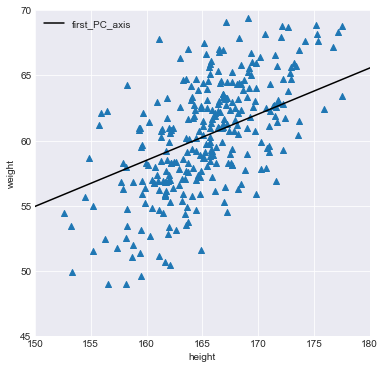

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(X.T[0],X.T[1],marker='^')
plt.plot(pca_point[0],pca_point[1],color='black',label='first_PC_axis')
plt.xlim(150,180)
plt.ylim(45,70)
plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.show()

In [22]:
# 任意のデータに主成分分析を実行
data = (160,50)
data_std = sc.transform([data])
data_pca = pca.transform(data_std)
print(data_pca)

[[ 2.48793062 -0.88428776]]
